# Ejercicios

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Ejecicio #1: Normalización

Dado un dataset X de n muestras y m features, implementar un método en numpy para normalizar con z-score. Pueden utilizar np.mean() y np.std().

In [30]:
n = 200
m = 3

def normalize(dataset):
    dataset -= np.mean(dataset, axis=0)
    dataset /= np.std(dataset, axis=0)    
    return dataset

# Create random dataset with different mean and standart deviation per row
dataset = np.random.normal(loc=[i for i in range(m)], scale=[i + 1 for i in range(m)], size=(n, m))
normalize(dataset)[:5]



array([[-0.08080771, -0.86566815,  0.54661195],
       [-0.97829072,  1.92897646, -2.30216662],
       [ 1.35856699,  1.26456653,  0.57291751],
       [ 0.27264547, -1.41703953,  0.3953336 ],
       [ 0.36785952, -0.40212943,  0.64192944]])

### Ejecicio #2: Remover filas y columnas con NaNs en un dataset

Dado un dataset, hacer una función que, utilizando numpy, filtre las columnas y las filas que tienen NaNs.

In [38]:
# Add random NaNs to datasets
dataset_nan = dataset.copy()
n_nan = 20
dataset_nan.ravel()[np.random.choice(dataset_nan.size, n_nan, replace=False)] = np.nan
dataset_nan[:10]

array([[-0.08080771, -0.86566815,         nan],
       [-0.97829072,  1.92897646, -2.30216662],
       [ 1.35856699,  1.26456653,  0.57291751],
       [ 0.27264547, -1.41703953,  0.3953336 ],
       [ 0.36785952, -0.40212943,  0.64192944],
       [-1.51548972,  2.18570759,  2.32999829],
       [ 0.33969916, -0.7045802 ,  0.34849299],
       [-0.53465246, -1.86645961, -0.71462062],
       [        nan,  1.04023499,  1.52048159],
       [-1.30854768,  0.91027196, -1.62026017]])

In [68]:
def delete_row_nan(dataset):
    return dataset[~np.isnan(dataset).any(axis=1)].copy()

def delete_col_nan(dataset):
    return dataset[:, ~np.isnan(dataset).any(axis=0)].copy()

print("Se eliminan todas las filas con NaNs")
print(delete_row_nan(dataset_nan)[:10])
print("Se eliminan todas las columnas con NaNs")
print(delete_col_nan(dataset_nan))


Se eliminan todas las filas con NaNs
[[-0.97829072  1.92897646 -2.30216662]
 [ 1.35856699  1.26456653  0.57291751]
 [ 0.27264547 -1.41703953  0.3953336 ]
 [ 0.36785952 -0.40212943  0.64192944]
 [-1.51548972  2.18570759  2.32999829]
 [ 0.33969916 -0.7045802   0.34849299]
 [-0.53465246 -1.86645961 -0.71462062]
 [-1.30854768  0.91027196 -1.62026017]
 [-0.93337254  1.13344349 -1.55911108]
 [ 0.57409567 -0.43068234  2.57112485]]
Se eliminan todas las columnas con NaNs
[]


### Ejecicio #3: Reemplazar NaNs por la media de la columna

Dado un dataset, hacer una función que utilizando numpy reemplace los NaNs por la media de la columna.

In [67]:
def replace_nan_mean(dataset):
    col_mean = np.nanmean(dataset, axis=0)
    return np.nan_to_num(dataset, nan=col_mean)

replace_nan_mean(dataset_nan)[:10]


array([[-0.08080771, -0.86566815,  0.01674418],
       [-0.97829072,  1.92897646, -2.30216662],
       [ 1.35856699,  1.26456653,  0.57291751],
       [ 0.27264547, -1.41703953,  0.3953336 ],
       [ 0.36785952, -0.40212943,  0.64192944],
       [-1.51548972,  2.18570759,  2.32999829],
       [ 0.33969916, -0.7045802 ,  0.34849299],
       [-0.53465246, -1.86645961, -0.71462062],
       [-0.01502518,  1.04023499,  1.52048159],
       [-1.30854768,  0.91027196, -1.62026017]])

### Ejecicio #4: Dado un dataset X separarlo en 70 / 20 / 10

A partir de utilizar np.random.permutation, hacer un método que dado un dataset, devuelva los 3 datasets como nuevos numpy arrays.

In [78]:
def divide_dataset(dataset, split):
    shuffled_dataset = np.random.permutation(dataset)
    train_index = int(split["train"] / 100 * shuffled_dataset.shape[0])
    val_index = int(split["val"] / 100 * shuffled_dataset.shape[0]) + train_index
    train = shuffled_dataset[:train_index]
    validation = shuffled_dataset[train_index:val_index]
    test = shuffled_dataset[val_index:]
    return train, validation, test
    
split = {"train": 70, "val": 20, "test": 10}
train, validation, test = divide_dataset(dataset, split)
print("Train shape: ", train.shape[0])
print("Validation shape: ", validation.shape[0])
print("Test shape: ", test.shape[0])

Train shape:  140
Validation shape:  40
Test shape:  20


### Ejercicio #5: A partir del dataset de consigna, aplicar los conceptos de regresión lineal.

Armar una clase para cargar el dataset en un ndarray estructurado

Incluir un método split a la clase para obtener los sets de training y test.

In [19]:
import pickle
import os
from numpy.lib.recfunctions import unstructured_to_structured

class DatasetHandler:
    _instance = None
    def __new__(cls, *args, **kwargs):
        if not isinstance(cls._instance, cls):
            cls._instance = super().__new__(cls)
        return cls._instance

    def __init__(self, path, dtypes):
        self.path = path
        self.dtypes = dtypes
        self.pickle_file = self.path.rsplit('.', 1)[0] + ".pkl"
        if os.path.exists(self.pickle_file):
            self.upload_pickle()
        else:
            self.upload_csv()

    def upload_pickle(self):
        print("Uploading pickle")
        with open(self.pickle_file,'rb') as f:
            self.data = pickle.load(f)

    def upload_csv(self):
        print("Uploading csv")
        dataset = np.genfromtxt(dataset_path, delimiter=",", skip_header=1)[:, 1:]
        self.data = unstructured_to_structured(dataset, dtype=np.dtype(datatypes))
        with open(self.pickle_file,'wb') as f:
            pickle.dump(self.data, f)

    def divide_dataset(self, split):
        shuffled_dataset = np.random.permutation(self.data)
        train_index = int(split["train"] / 100 * shuffled_dataset.shape[0])
        val_index = int(split["val"] / 100 * shuffled_dataset.shape[0]) + train_index
        self.train = shuffled_dataset[:train_index]
        self.validation = shuffled_dataset[train_index:val_index]
        self.test = shuffled_dataset[val_index:]
        return self.train, self.validation, self.test

dataset_path = "income.csv"
datatypes = [("income", 'f8'), ("happiness", 'f8')]
split = {"train": 70, "val": 20, "test": 10}

dataset_handler = DatasetHandler(path=dataset_path, dtypes=datatypes)
train, validation, test = dataset_handler.divide_dataset(split)

print("train shape: ", train.shape)
print("validation shape: ", validation.shape)
print("test shape: ", test.shape)

Uploading pickle
train shape:  (348,)
validation shape:  (99,)
test shape:  (51,)


Crear una clase métrica base y una clase MSE (Error cuadrático medio) que herede de la clase base.

In [177]:
class BaseMetric:
    def __init__(self, **kwargs):
        self.truth = kwargs.get("truth", [])
        self.prediction = kwargs.get("prediction", [])

class MSE(BaseMetric):
    def __call__(self):
        for i in range(self.truth.shape[0]):
            print(self.truth[i], self.prediction[i])
        return 1 / self.truth.shape[0] * np.sum((self.truth - self.prediction) ** 2)

Crear una clase modelo base y clases regresión lineal y regresión afín que hereden de la primera. Usar los conocimientos teóricos vistos en clase.

In [230]:
from abc import ABC, abstractmethod

class BaseModel(ABC):
    def __init__(self, train, val, test):
        self.train_data = train
        self.val_data = val
        self.test_data = test

    @abstractmethod
    def train(self):
        pass

    @abstractmethod
    def predict(self):
        pass

class LinearRegression(BaseModel):
    def train(self):
        # Transform into numpy array
        train_data = self.train_data.view(np.float64).reshape(self.train_data.shape + (-1,))
        # Get data and labels, too hardcoded
        labels = train_data[:, -1]
        X = train_data[:, :-1]
        # Add column to get b
        X = np.c_[X, np.ones(X.shape[0])]
        # Get w and b
        trained_model = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(labels)
        self.w = trained_model[:-1]
        self.b = trained_model[-1]

    def predict(self):
        train_data = self.train_data.view(np.float64).reshape(self.train_data.shape + (-1,))
        X = train_data[:, :-1]
        return self.w * X + self.b
     

Hacer un fit de las regresiones con los datos de entrenamiento.

In [231]:
regr_lin = LinearRegression(train, validation, test)
regr_lin.train()

Hacer un predict sobre los datos de test y reportar el MSE en cada caso.

In [233]:
error = MSE(truth=test["happiness"], prediction=regr_lin.predict())()
print("MSE: ", error)

MSE:  1068.9929465911857


Graficar la curva obtenida.

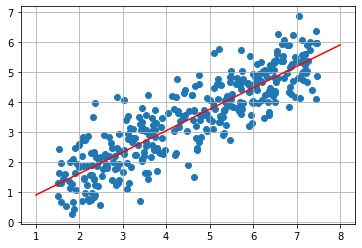

In [91]:
plt.scatter(train["income"], train["happiness"])
x_val = np.arange(1, 9)
regr_line = regr_lin.w * x_val + regr_lin.b 
plt.plot(x_val, regr_line, 'r')
plt.grid()